In [92]:
import pandas as pd
import uteis


In [94]:
root = str(uteis.openfile())
print (root)
df = pd.read_excel(root)


C:/Projetos/Mercados/Trading_System/Database/ResumenExperimentos1H-GGALST1(2-6).xlsx


In [95]:
arq = (root.split('/')[-1])
print(arq)
tic = (arq.split('-')[0])[-2:]
print (tic)

ResumenExperimentos1H-GGALST1(2-6).xlsx
1H


In [98]:
display(df.head())

,symbol,fechaIni,fechaFin,k,d,smoth,day mult,sem mult,long index,maxLong,minLong,short index,maxShort,minShort,long+short,maxInd,minInd
0,GGAL_ADR-ST1,2013-09-09 13:30:00,2015-08-28 19:30:00,8,8,3,5,5,4.338066,4.427189,1.000000,1.368949,1.429001,0.865145,5.938591,6.060596,1.000000
1,GGAL_ADR-ST1,2017-02-21 14:30:00,2018-12-10 19:30:00,14,8,4,6,4,2.506337,2.589278,0.993976,2.324449,2.509510,0.938396,5.825851,6.107363,0.994517
2,GGAL_ADR-ST1,2013-09-09 13:30:00,2015-08-28 19:30:00,8,8,3,5,4,4.338066,4.427189,1.000000,1.268604,1.324254,0.865145,5.503289,5.616351,1.000000
3,GGAL_ADR-ST1,2017-02-21 14:30:00,2018-12-10 19:30:00,14,8,4,6,5,2.464038,2.556094,0.993976,2.219710,2.396433,0.938396,5.469449,5.733739,0.994517
4,GGAL_ADR-ST1,2011-12-19 14:30:00,2014-01-03 20:30:00,9,4,7,6,5,3.161140,3.549782,0.993289,1.694444,1.855964,0.980116,5.356375,5.392143,1.000000


In [100]:
#display(df.describe)

In [102]:
display(df.dtypes)

symbol                 object
fechaIni       datetime64[ns]
fechaFin       datetime64[ns]
k                       int64
d                       int64
smoth                   int64
day mult                int64
sem mult                int64
long index            float64
maxLong               float64
minLong               float64
short index           float64
maxShort              float64
minShort              float64
long+short            float64
maxInd                float64
minInd                float64
dtype: object

In [104]:
display(df.columns)

Index(['symbol', 'fechaIni', 'fechaFin', 'k', 'd', 'smoth', 'day mult',
       'sem mult', 'long index', 'maxLong', 'minLong', 'short index',
       'maxShort', 'minShort', 'long+short', 'maxInd', 'minInd'],
      dtype='object')

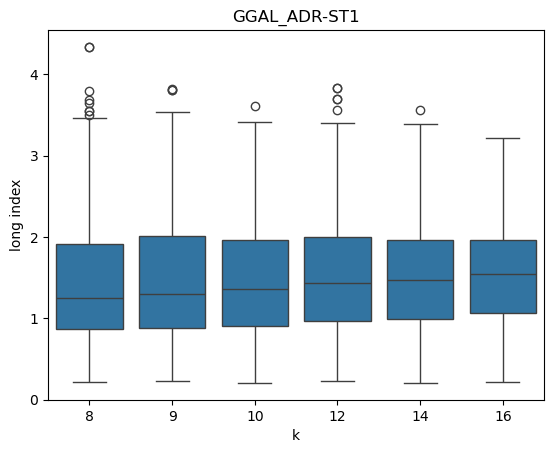

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar gráfico de linha com seaborn
sns.boxplot(data=df, x='k', y ='long index' )
plt.xlabel('k')
plt.ylabel('long index')
plt.yscale('linear')
plt.title(df.iloc[1]['symbol'])
plt.show()

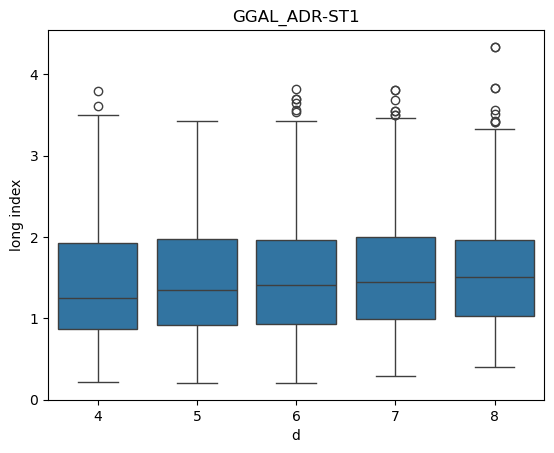

In [108]:
# Plotar gráfico de linha com seaborn
sns.boxplot(data=df, x='d', y ='long index' )
plt.xlabel('d')
plt.ylabel('long index')
plt.yscale('linear')
plt.title(df.iloc[1]['symbol'])
plt.show()

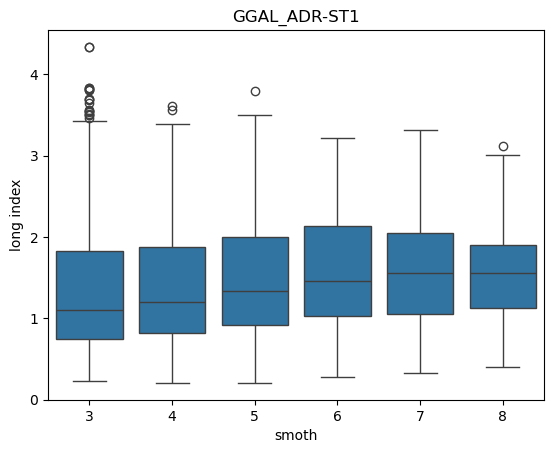

In [110]:
sns.boxplot(data=df, x='smoth', y ='long index' )
plt.xlabel('smoth')
plt.ylabel('long index')
plt.yscale('linear')
plt.title(df.iloc[1]['symbol'])
plt.show()

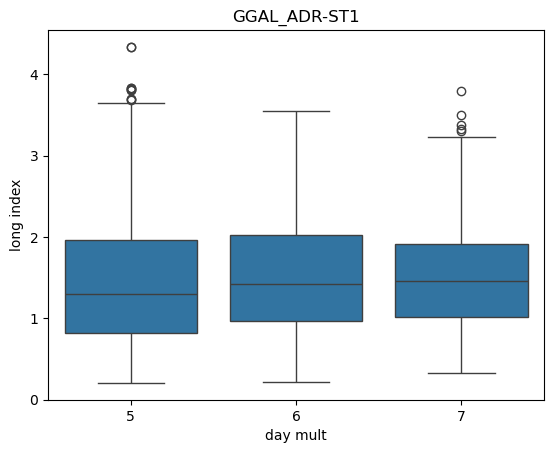

In [112]:
sns.boxplot(data=df, x='day mult', y ='long index' )
plt.xlabel('day mult')
plt.ylabel('long index')
plt.yscale('linear')
plt.title(df.iloc[1]['symbol'])
plt.show()

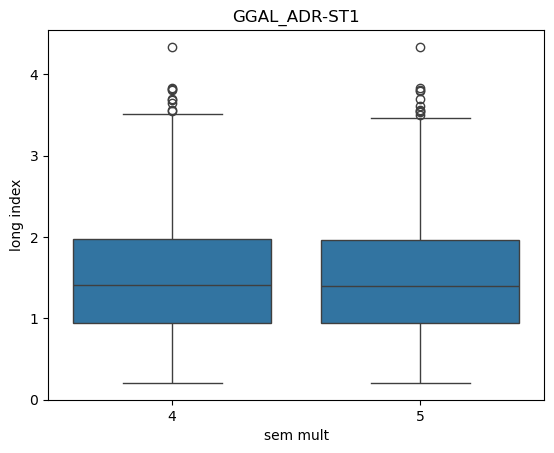

In [114]:
sns.boxplot(data=df, x='sem mult', y ='long index' )
plt.xlabel('sem mult')
plt.ylabel('long index')
plt.yscale('linear')
plt.title(df.iloc[1]['symbol'])
plt.show()

In [116]:
dfgraf = df[['k','d','smoth','day mult','sem mult','long index']]
display (dfgraf.head(10))

,k,d,smoth,day mult,sem mult,long index
0,8,8,3,5,5,4.338066
1,14,8,4,6,4,2.506337
2,8,8,3,5,4,4.338066
3,14,8,4,6,5,2.464038
4,9,4,7,6,5,3.161140
5,14,5,7,6,4,2.196916
6,14,8,3,6,4,2.455412
7,12,8,6,6,5,2.482732
8,16,6,4,5,5,2.459263
9,16,8,6,5,4,2.386493


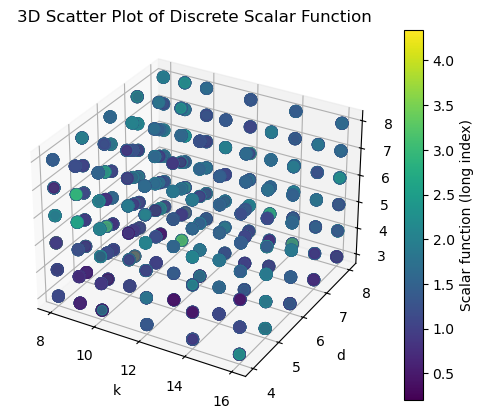

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with k, d, smoth as coordinates
scatter = ax.scatter(dfgraf['k'], dfgraf['d'], dfgraf['smoth'], c=dfgraf['long index'], s=dfgraf['day mult']*10, cmap='viridis')

ax.set_xlabel('k')
ax.set_ylabel('d')
ax.set_zlabel('smoth')
ax.set_title('3D Scatter Plot of Discrete Scalar Function')

# Adding colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Scalar function (long index)')

plt.show()


In [120]:
from datetime import datetime
dftb_exp = df.copy()
dftb_exp.insert(0,'Arquiv',arq)
dftb_exp.insert(2,'Tic',tic)

dftb_exp.insert(2,'TrdSys',dftb_exp['symbol'].str.split('-', expand=True)[1])
dftb_exp['symbol'] = dftb_exp['symbol'].str.split('-', expand=True)[0]
dftb_exp.insert(0,'idExper',dftb_exp['symbol']+dftb_exp['TrdSys']+ dftb_exp['Tic'] + dftb_exp['k'].astype(str)+ dftb_exp['d'].astype(str)+ dftb_exp['smoth'].astype(str)+ dftb_exp['day mult'].astype(str)+ dftb_exp['sem mult'].astype(str)+ dftb_exp['fechaIni'].astype(str))

display(dftb_exp.head())



,idExper,Arquiv,symbol,TrdSys,Tic,fechaIni,fechaFin,k,d,smoth,...,sem mult,long index,maxLong,minLong,short index,maxShort,minShort,long+short,maxInd,minInd
0,GGAL_ADRST11H883552013-09-09 13:30:00,ResumenExperimentos1H-GGALST1(2-6).xlsx,GGAL_ADR,ST1,1H,2013-09-09 13:30:00,2015-08-28 19:30:00,8,8,3,...,5,4.338066,4.427189,1.000000,1.368949,1.429001,0.865145,5.938591,6.060596,1.000000
1,GGAL_ADRST11H1484642017-02-21 14:30:00,ResumenExperimentos1H-GGALST1(2-6).xlsx,GGAL_ADR,ST1,1H,2017-02-21 14:30:00,2018-12-10 19:30:00,14,8,4,...,4,2.506337,2.589278,0.993976,2.324449,2.509510,0.938396,5.825851,6.107363,0.994517
2,GGAL_ADRST11H883542013-09-09 13:30:00,ResumenExperimentos1H-GGALST1(2-6).xlsx,GGAL_ADR,ST1,1H,2013-09-09 13:30:00,2015-08-28 19:30:00,8,8,3,...,4,4.338066,4.427189,1.000000,1.268604,1.324254,0.865145,5.503289,5.616351,1.000000
3,GGAL_ADRST11H1484652017-02-21 14:30:00,ResumenExperimentos1H-GGALST1(2-6).xlsx,GGAL_ADR,ST1,1H,2017-02-21 14:30:00,2018-12-10 19:30:00,14,8,4,...,5,2.464038,2.556094,0.993976,2.219710,2.396433,0.938396,5.469449,5.733739,0.994517
4,GGAL_ADRST11H947652011-12-19 14:30:00,ResumenExperimentos1H-GGALST1(2-6).xlsx,GGAL_ADR,ST1,1H,2011-12-19 14:30:00,2014-01-03 20:30:00,9,4,7,...,5,3.161140,3.549782,0.993289,1.694444,1.855964,0.980116,5.356375,5.392143,1.000000


In [136]:
import pandas as pd
import sqlite3

# Create a connection to the SQLite database
conexao = sqlite3.connect('dbExperimentos.db')

# Load the schema of the two tables into DataFrames
columns_table1 = pd.read_sql("PRAGMA table_info(dbtb_experimento);", conexao)['name']
columns_table2 = pd.read_sql("PRAGMA table_info(dbtb_Experimento1);", conexao)['name']

# Compare the columns
common_columns = set(columns_table1).intersection(set(columns_table2))
unique_to_table1 = set(columns_table1) - set(columns_table2)
unique_to_table2 = set(columns_table2) - set(columns_table1)

# Print the results
print("Common Columns:", common_columns)
print("Unique to Table 1:", unique_to_table1)
print("Unique to Table 2:", unique_to_table2)

# Close the connection
conexao.close()


Common Columns: {'maxInd', 'short index', 'minLong', 'fechaIni', 'idExper', 'd', 'symbol', 'long index', 'Arquiv', 'sem mult', 'fechaFin', 'smoth', 'Tic', 'minShort', 'k', 'TrdSys', 'long+short', 'day mult', 'minInd'}
Unique to Table 1: {'minLongAcu', 'maxLongAcu', 'cantSeñales', 'maxShortAcu', 'minShortAcu'}
Unique to Table 2: {'maxLong', 'maxShort'}


In [134]:
import sqlite3
# Conecte-se ao banco de dados (ou crie um novo arquivo de banco de dados)
conexao = sqlite3.connect('dbExperimentos.db')
# Exportar o DataFrame para uma tabela no banco de dados SQLite
dftb_exp.to_sql('dbtb_Experimento1', conexao, if_exists ='append', index=False)
# Fechar a conexão
conexao.close()

In [130]:
# Conectar ao banco de dados SQLite
conn = sqlite3.connect('dbExperimentos.db')
#conn.execute("DROP VIEW IF EXISTS sqArquivos")
# Ler a tabela para um DataFrame do pandas
sqArquivos = pd.read_sql('SELECT * from sqArquivos', conn)
# Fechar a conexão
conn.close()
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#sqArquivos = df.style.set_properties(**{'text-align': 'left'})
# Mostrar o DataFrame
display (sqArquivos)

,Arquiv,Files
0,ResumenExperimentos15min(03-10-22) - Periodo1.xlsx,1536
1,ResumenExperimentos15min(03-10-22) - Periodo2.xlsx,1536
2,ResumenExperimentos15min(03-11-22)(Est2) - Periodo1.xlsx,1536
3,ResumenExperimentos15min(03-11-22)(Est2) - Periodo2.xlsx,1536
4,ResumenExperimentos15min_EST2(08-11-22) - Periodo1.xlsx,1536
5,ResumenExperimentos15min_EST2(08-11-22) - Periodo2.xlsx,1536
6,ResumenExperimentos1H(03-10-22) - Periodo1.xlsx,2520
7,ResumenExperimentos1H(03-10-22) - Periodo2.xlsx,2520
8,ResumenExperimentos1H-EEM(18-10-22) - Periodo1.xlsx,2520
9,ResumenExperimentos1H-EEM(18-10-22) - Periodo2.xlsx,2520
